# Diving Deep into the Twitter API

### Twitter API and Authentication

- Stream data from Twitter API
- Filter incoming tweets for keywords
- About API authentication and OAuth Principles
- Basics of the package Tweepy, many Python users use to interact with Twitter

Twitter API requires you have an account
1. Create Twitter Account
2. Login to apps.twitter.com, 'Create new app'
3. agree to T&C
4. Retrieve Authentication credentials that will allow you to access the Twitter API.  Go to 'Keys and Access Tokens' tab and copy
    - API Key
    - API Secret
    - Access Token
    - Access Token Secret

Twitter has a number of APIs:
1. REST API - provide programmatic access to read/write Twitter data.  Author a new Tweet, read author profile and follower data, and more.  The REST API identifies Twitter applications and users using OAuth; responses are available in JSON.  
    - REST is short for Representational State Transfer
    - Twitter's REST allows you to Read and Write Twitter data
    - Good for conducting singular searches, read user profile information, or post Tweets   
2. If your intention is to monitor or process Tweets in real-time, consider using the Streaming API
    - The Streaming APIs give develpers low latency access to Twitter's global stream of Tweet data.  A proper implmentation of a streaming client will be pushed messages indicating Tweets and other events have occurred, without any of the overhead associated with pollin a REST endpoint.  
    - Several Streaming Endpoints
    - Public Streams - Streams of the public data flowing through Twitter suitable for following specific users or topics, and data mining
    - User Streams - single-user streams, containing roughtly all of the data corresponding with a single user's view of Twitter
    - Site Streams - The multi-user version of user streams.  Site streams are intended for servers which must connect to Twitter on behalf of many users.

    

#### We will be using the Public Stream:
- GET statuses/sample API
    -Returns a small random sample of all public statuses.  The Tweets returned by the default access level are the same, so if two different clients connect to this endpoint, they will see the same Tweets

- Resource URL
    - https:/stream.twitter.com/1.1/statuses/sample.json

- Firehose API - GET stuses/firehose
    - This endpoint requires special permission to acccess.
    - Returns all public statuses.  Few applications require this level of access.  Creative use of a combination of other resources and various access levels can satisfy nearly every application use case.
    - costs Money
    
#### Tweets are returned as JSONs
- https://dev.twitter.com/overview/api/tweets
- Field guide, get tweet text, language, time of tweet, among many other fields
- 

#### Tweepy Package

Recommended for first time Twitter APIs users.  Has a nice balance of usability and capability

Has an OAuth handler, which takes care of all of the nasty stuff for you:  all you need to do is pass the API key and Secret to the handler and then to pass the access credentials using the set_access_token method

In [2]:
# Sample

import tweepy, json

access_token = "..."
access_token_secret = "..."
consumer_key = "..."
consumer_secret = "..."

# pass the API Key and Secret to the handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# pass the access credentials using the set_access_token method
auth.set_access_token(access_token, access_token_secret)



ModuleNotFoundError: No module named 'tweepy'

After this, you'll need to define the Twitter Stream Listener Class

datacamp will define this for you.



In [9]:
# You need to define your Twitter Stream User Class
# Tweepy: define stream listener class

import tweepy, json

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets=0
        self.file = open("tweets.txt", "w") #create tweets.txt
        
    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n') #writes to file
        tweet_list.append(status)
        self.num_tweets += 1
        if self.num_tweets < 100:  # closes after 100 tweets
            return True
        else:
            return False
        self.file.close()  # Listener closes the file, and stops listening

Once you have the Stream Listener Class, you need to authenticate it.  You can then stream tweets that contain keywords by applying filter

In [10]:
# Create Streaming object and authenticate
l = MyStreamListener()
stream = tweepy.Stream(auth, l)

# This line filters Twitter Streams to capture data by Keywords
stream.filter(track=['apples', 'oranges'])

NameError: name 'auth' is not defined

#### API Authentication

The package tweepy is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a Twitter App as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

In [1]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


In [2]:
auth

#### Streaming tweets

Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, MyStreamListener, just as Hugo did in the introductory video. You can find the code for the tweet stream listener class here: https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4

Your task is to create the Streamobject and to filter tweets according to particular keywords.

In [3]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [4]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])


401
401
401
401
401
401
401


KeyboardInterrupt: 

#### Load and explore your Twitter data

Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: tweets_data.

In [5]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = './data/tweets3.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())


dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


#### Twitter data to DataFrame

Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text']; similarly, the language is stored in t1['lang']. Your task is to build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

In [6]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
df.head()


,text,lang
0,RT @bpolitics: .@krollbondrating's Christopher...,en
1,RT @HeidiAlpine: @dmartosko Cruz video found.....,en
2,Njihuni me Zonjën Trump !!! | Ekskluzive https...,et
3,Your an idiot she shouldn't have tried to grab...,en
4,RT @AlanLohner: The anti-American D.C. elites ...,en


#### A little bit of Twitter text analysis

Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).



You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

In [15]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [16]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])
    


In [17]:
print([clinton, trump, sanders, cruz])

[9, 77, 6, 14]


#### Plotting your Twitter data

Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library seaborn, which you may not have seen before, but we'll guide you through. You'll first import seaborn as sns. You'll then construct a barplot of the data using sns.barplot, passing it two arguments:

a list of labels and
a list containing the variables you wish to plot (clinton, trump and so on.)
Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment.

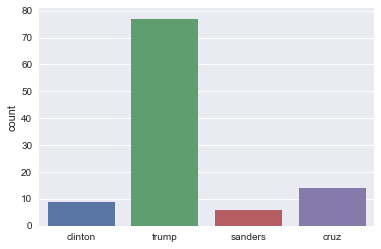

In [19]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(['clinton', 'trump', 'sanders', 'cruz'], [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()

#### Final Thoughts

Deep dive into the Twitter API.
Streamed
Processed
Visualized Results

You are now able to import data from a wide array of resources.  Now adept at importing
- Text and Flat Files
- Local files, xls, sas, stata, pickle, html5 files
    - make you an even better collaborator
- sql queries
- getting data from relational databases
- pull data from web, and some basic html parsing
- Pulling data from APIs